In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")

In [3]:
clean_species = {
    r'(?i)^.*white shark.*$': 'white shark', # Carcharodon carcharias
    r'(?i)^.*requiem.*$': 'requiem sharks', # Order Carcharhiniformes:
                                             # contains bull shark, lemon shark, blacktip shark and whitetip reef
    r'(?i)^.*wobbeg.*$': 'wobbegong', # Family Orectolobidae, contains 12 species. These are small (~1m), carpet sharks
    r'(?i)^.*carpet.*$' : 'wobbegong',
    r'(?i)^.*blue pointer.*$': 'blue pointer', # Isurus oxyrinchus
    r'(?i)^.*shortfin.*$': 'blue pointer',
    r'(?i)^.*mako.*$' : 'blue pointer',
    r'(?i)^.*blue whaler.*$' : 'blue shark', # Prionace glauca
    r'(?i)^.*blue shark.*$' : 'blue shark',
    r'(?i)^.*blue nose.*$' : 'blue shark',
    r'(?i)^.*blue-nose.*$' : 'blue shark',
    r'(?i)^.*sand.*$': 'sand tiger', # Carcharias taurus
    r'(?i)^.*grey nurse.*$' : 'sand tiger',
    r'(?i)^.*ragged.*$' : 'sand tiger',
    r'(?i)^.*hammerhead.*$': 'hammerhead', # Family Sphyrnidae
    # r'(?i)^.*tiger.*$': 'tiger shark' #,
    r'(?i)^.*bull.*$': 'bull shark', # Carcharhinus leucas
    r'(?i)^.*leucas.*$' : 'sevengill shark',
    r'(?i)^.*zamb.*$' : 'bull shark',
    # Sometimes just zambi, or zambesi, or zambezi
    r'(?i)^.*blacktip reef.*$': 'blacktip reef', # Carcharhinus melanopterus
    r'(?i)^.*blacktip "reef".*$': 'blacktip reef',
    r'(?i)^.*blacktail reef.*$': 'blacktip reef',
    r'(?i)^.*blacktip shark.*$': 'blacktip shark', # Carcharhinus limbatus
    r'(?i)^.*blackfin.*$' : 'blacktip shark',
    r'(?i)^.*black-tipped.*$' : 'blacktip shark',
    r'(?i)^.*grey reef.*$': 'grey reef', # Carcharhinus amblyrhynchos
    r'(?i)^.*oceanic white.*$': 'whitetip shark', # Carcharhinus longimanus
    r'(?i)^.*whitetip shark.*$': 'whitetip shark',
    r'(?i)^.*lemon.*$': 'lemon shark', # Negaprion brevirostris
    r'(?i)^.*bronze.*$': 'copper shark', # Carcharhinus brachyurus
    r'(?i)^.*copper.*$' : 'copper shark',
    r'(?i)^.*narrowtooth.*$' : 'copper shark',
    r'(?i)^.*whaler shark.*$' : 'copper shark',
    r'(?i)^.*spinner.*$': 'spinner shark', # Carcharhinus brevipinna
    r'(?i)^.*cookie.*$': 'cookiecutter shark', # Isistius brasiliensis
    r'(?i)^.*nurse shark.*$': 'nurse shark', # Ginglymostoma cirratum
    r'(?i)^.*sickle.*$': 'sicklefin shark', # Negaprion acutidens
    r'(?i)^.*sharptooth.*$': 'sicklefin shark',
    r'(?i)^.*caribbean reef.*$': 'caribbean reef', # Carcharhinus perezi
    r'(?i)^.*seven.*$' : 'sevengill shark', # Notorynchus cepedianus
    r'(?i)^.*broadnose.*$' : 'sevengill shark',
    r'(?i)^.*7-gill.*$' : 'sevengill shark',
    r'(?i)^.*dog.*$' : 'dog shark',
    r'(?i)^.*bask.*$' : 'basking shark', # Cetorhinus maximus
    r'(?i)^.*whale shark.*$' : 'whale shark', # Rhyncodon typus
    r'(?i)^.*galapagos shark.*$' : 'galapagos shark', # Carcharhinus galapagensis
    r'(?i)^.*salmon.*$' : 'salmon shark', # Lamna ditropis
    r'(?i)^.*dusky.*$' : 'dusky shark', # Carcharhinus obscurus
    r'(?i)^.*obscur.*$' : 'dusky shark',
    r'(?i)^.*angel.*$' : 'angel shark',
    r'(?i)^.*questionable.*$' : 'questionable',
    r'(?i)^.*unconf.*$': 'shark involvement unconfirmed',
    r'(?i)^.*invalid.*$': 'invalid',
}

data['Species '].replace(to_replace=clean_species, regex=True, inplace=True)

# We'll have tou courate tiger sharks separately because of sand tigers
tiger_shark = {
    r'(?i)^.*tiger shark.*$' : 'tiger shark'
}

data['Species '] = data['Species '].replace(tiger_shark, regex=True)

In [4]:
data['Species '].value_counts().to_dict()

{'white shark': 699,
 'tiger shark': 292,
 'bull shark': 257,
 'sand tiger': 144,
 'Shark involvement prior to death was not confirmed': 105,
 'invalid': 103,
 'Shark involvement not confirmed': 92,
 'blacktip shark': 88,
 'copper shark': 85,
 'questionable': 82,
 'shark involvement unconfirmed': 76,
 'nurse shark': 72,
 'blue pointer': 66,
 'wobbegong': 64,
 'blue shark': 52,
 'spinner shark': 50,
 'hammerhead': 50,
 'lemon shark': 44,
 "4' shark": 43,
 "6' shark": 43,
 "1.8 m [6'] shark": 35,
 'whitetip shark': 33,
 "1.5 m [5'] shark": 32,
 "5' shark": 29,
 'sevengill shark': 27,
 "3' shark": 27,
 "4' to 5' shark": 27,
 "1.2 m [4'] shark": 27,
 '2 m shark': 26,
 "3 m [10'] shark": 22,
 'No shark involvement': 21,
 "3' to 4' shark": 20,
 'grey reef': 20,
 'caribbean reef': 17,
 'blacktip reef': 17,
 '3 m shark': 17,
 "12' shark": 16,
 "2.4 m [8'] shark": 16,
 "3.7 m [12'] shark": 15,
 "1.2 m to 1.5 m [4' to 5'] shark": 14,
 "7' shark": 14,
 'dusky shark': 13,
 '"a small shark"': 13,
 

In [5]:
shark_breeds = ['white shark', 'tiger shark', 'bull shark', 'sand tiger', 'blacktip shark', 'copper shark', 'nurse shark', 'blue pointer', 'wobbegong', 'blue shark', 'spinner shark', 'hammerhead', 'lemon shark', 'whitetip shark', 'sevengill shark', 'grey reef', 'blacktip reef', 'dusky shark', 'dog shark', 'galapagos shark', 'basking shark', 'angel shark', 'cookiecutter shark', 'salmon shark', 'whale shark']

In [6]:
len(shark_breeds)

25

In [7]:
data['Species '] = data['Species '].apply(lambda breed: breed if breed in shark_breeds else 'NaN')

In [8]:
data.rename(columns = {'Species ' : 'breed'}, inplace=True)

In [9]:
data['breed'].replace('NaN', np.nan, regex=True, inplace=True)

In [10]:
breed_atks = data['breed'].value_counts().to_dict()

In [11]:
hl_df = data.rename(columns={'Injury':'injury'}, inplace=True)

In [12]:
data.loc[data['injury'].str.contains('fatal|FATAL|bitten in two|Body was not recovered|Human remains|Torso recovered', case=False, na=False), 'injury'] = 'Fatal'
data.loc[data['injury'].str.contains('bitten|injured|severed|puncture|injury|nipped|gashed|broke injuries|bite|scavenged|slashed|ripped|bit|lost|major injuries', case=False, na=False), 'injury'] = 'Dramatic'
data.loc[data['injury'].str.contains('survived|no injury|no details|lacerat|minor|recovered|abraded|bruised|broken', case=False, na=False), 'injury'] = 'Minor'
categories = ['Fatal', 'Dramatic', 'Minor']
data['injury'] = data['injury'].apply(lambda x: x if x in categories else 'Others')

In [13]:
data['injury'].value_counts()

injury
Dramatic    3315
Minor       1629
Fatal       1466
Others       560
Name: count, dtype: int64

In [14]:
data['Country'].value_counts()

Country
USA                   2550
AUSTRALIA             1481
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
EGYPT / ISRAEL           1
Jamaica                  1
MEXICO                   1
Seychelles               1
CEYLON (SRI LANKA)       1
Name: count, Length: 234, dtype: int64

In [18]:
df = data[['Country', 'injury', 'breed']]

In [19]:
df.rename(columns=
         {'Injury' : 'injury',
         'Country' : 'location'},
         inplace=True)

In [20]:
df['injury'].replace('Others', np.nan, inplace=True)

In [21]:
df['location'].replace('not clarified', np.nan, inplace=True)

In [22]:
df.dropna()

,location,injury,breed
1,Jamaica,Dramatic,tiger shark
3,Australia,Dramatic,white shark
5,USA,Dramatic,blacktip shark
7,USA,Dramatic,bull shark
18,USA,Dramatic,sand tiger
...,...,...,...
6944,BELIZE,Fatal,tiger shark
6961,AUSTRALIA,Fatal,blue pointer
6962,AUSTRALIA,Fatal,blue pointer
6963,AUSTRALIA,Fatal,blue pointer


In [213]:
breeds = list(df['breed'].value_counts().to_dict().keys())
attacks = list(df['breed'].value_counts().to_dict().values())

In [214]:
df2 = pd.DataFrame({'breed':breeds, 'reports' : attacks})
df2.index = range(1, len(df2) + 1)
df2

,breed,reports
1,white shark,699
2,tiger shark,292
3,bull shark,257
4,sand tiger,144
5,blacktip shark,88
6,copper shark,85
7,nurse shark,72
8,blue pointer,66
9,wobbegong,64
10,blue shark,52


In [23]:
clean_rdate = {
    r'(?i)^.*jan.*$': 'jan',
    r'(?i)^.*feb.*$': 'feb',
    r'(?i)^.*mar.*$': 'mar',
    r'(?i)^.*apr.*$': 'apr',
    r'(?i)^.*may.*$': 'may',
    r'(?i)^.*jun.*$': 'jun',
    r'(?i)^.*jul.*$': 'jul',
    r'(?i)^.*aug.*$': 'aug',
    r'(?i)^.*sep.*$': 'sep',
    r'(?i)^.*oct.*$': 'oct',
    r'(?i)^.*nov.*$': 'nov',
    r'(?i)^.*dec.*$': 'dec',
}

data['Date'].replace(clean_rdate, regex=True, inplace=True)

In [24]:
seasons = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data['Date'] = data['Date'].apply(lambda x: x if x in seasons else 'NaN')

In [25]:
white_shark = data.loc[data['breed'] == 'white shark']
data['Date'].replace('NaN', np.nan, inplace=True)

In [26]:
top_atk = data.loc[data['breed'].isin(['white shark', 'tiger shark', 'bull shark', 'blacktip shark', 'copper shark', 'nurse shark', 'blue pointer', 'wobbegong', 'blue shark'])]
seasons = list(data['Date'])
top_list = list(top_atk['breed'])

In [27]:
seasons_2 = pd.Series(seasons)
top_2 = pd.Series(top_list)

In [33]:
my_dict = {
    'month' : seasons_2,
    'breed' : top_2
}

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the 'month' column to a categorical type with the correct order
df5['month'] = pd.Categorical(df5['month'], categories=month_order, ordered=True)

df4 = pd.DataFrame(my_dict)
df5 = df4.dropna()
df5['breed'].value_counts()

breed
white shark       690
tiger shark       284
bull shark        251
blacktip shark     85
copper shark       84
nurse shark        71
blue pointer       66
wobbegong          64
blue shark         50
Name: count, dtype: int64

In [36]:
df5['month'] = pd.Categorical(df5['month'], categories=month_order, ordered=True)
pd.crosstab(df5['breed'], df5['month'])

month,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
breed,,,,,,,,,,,,
blacktip shark,8,5,2,6,7,4,18,9,9,8,3,6
blue pointer,2,5,5,5,5,12,10,2,9,4,4,3
blue shark,7,2,3,3,2,7,6,5,3,4,3,5
bull shark,20,12,15,17,22,25,30,25,27,26,15,17
copper shark,6,2,7,9,11,6,12,6,10,3,3,9
nurse shark,4,1,5,6,8,9,12,6,7,2,8,3
tiger shark,18,16,22,17,36,30,35,26,21,28,17,18
white shark,41,43,50,59,38,70,96,69,62,69,43,50
wobbegong,1,1,6,7,4,9,4,7,13,11,0,1


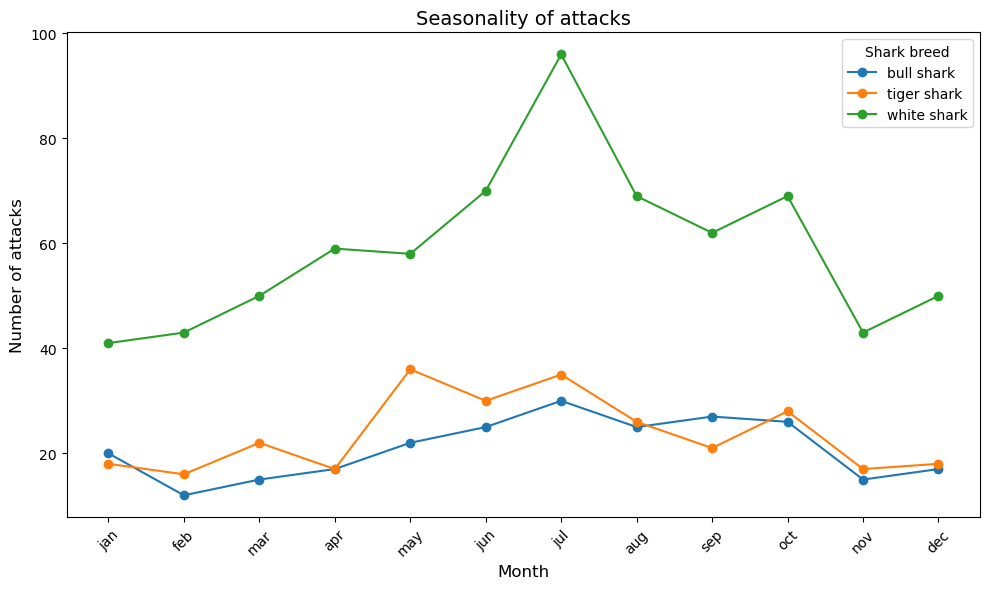

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
dict_2 = {
    'month': ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
    'bull shark': [17, 25, 17, 12, 20, 30, 25, 15, 22, 15, 26, 27],
    'tiger shark': [17, 26, 18, 16, 18, 35, 30, 22, 36, 17, 28, 21],
    'white shark': [59, 69, 50, 43, 41, 96, 70, 50, 58, 43, 69, 62],
}

# Create DataFrame
df = pd.DataFrame(dict_2)

# Define the correct month order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the 'month' column to a categorical type with the correct order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column to reflect this order
df = df.sort_values('month')

# Set the month column as the index to help with plotting
df.set_index('month', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
for breed in df.columns:
    plt.plot(df.index, df[breed], marker='o', label=breed)

# Adding labels and title
plt.title('Seasonality of attacks', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of attacks', fontsize=12)
plt.legend(title="Shark breed")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()




In [299]:
locations = data.loc[(data['Country']=='USA') | (data['Country']=='AUSTRALIA')]
usa = locations.loc[locations['Country']=='USA']
aus = locations.loc[locations['Country']=='AUSTRALIA']

In [325]:
# usa.loc[(usa['Date'].isin(['jun', 'jul', 'aug'])) & (usa['breed']=='white shark')]
# Out of 220 attacks of White Sharks in summer, 77 were in the USA (35%)

In [326]:
# usa.loc[(usa['Date'].isin(['dec', 'jan', 'feb'])) & (usa['breed']=='white shark')]
# Out of 145 attacks of white sharks in winter, 21 were in the USA (14%)

In [327]:
# aus.loc[(aus['Date'].isin(['dec', 'jan', 'feb'])) & (aus['breed']=='white shark')]
# Out of 145 attacks of white sharks in winter, only 49 were in Australia

In [328]:
# aus.loc[(aus['Date'].isin(['jun', 'jul', 'aug'])) & (aus['breed']=='white shark')]
# Out 220 attacks of white sharks in summer, 44 were in Australia

In [332]:
usa_atks = {
    'summer' : 77,
    'winter' : 21,
}

aus_atks = {
    'summer' : 49,
    'winter' : 44,
    
}

In [333]:
mig_pat = {
    'USA' : usa_atks,
    'AUS' : aus_atks
}

mig_pat

{'USA': {'summer': 77, 'winter': 21}, 'AUS': {'summer': 49, 'winter': 44}}

In [334]:
cross_tb = pd.DataFrame(mig_pat)
cross_tb

,USA,AUS
summer,77,49
winter,21,44


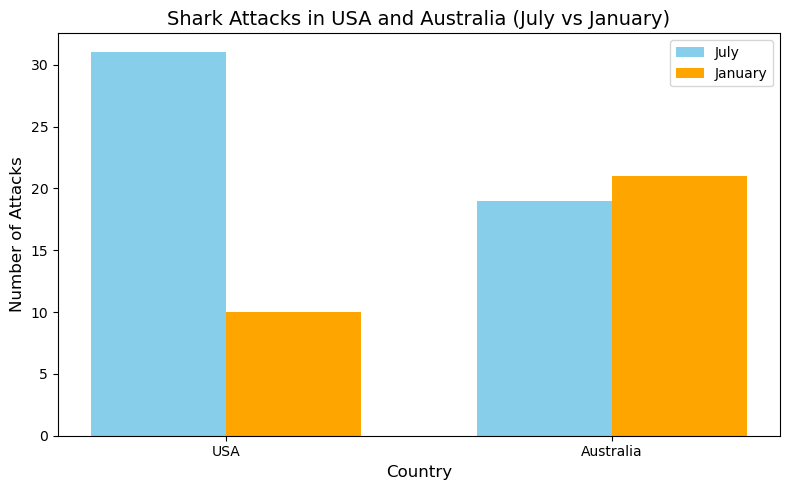

In [314]:
import matplotlib.pyplot as plt

# Data for shark attacks in USA and Australia
data = {'Country': ['USA', 'Australia'],
        'July': [31, 19],
        'January': [10, 21]}

# Plotting
plt.figure(figsize=(8, 5))

# Plot bars for July and January attacks side by side for USA and Australia
bar_width = 0.35
r1 = [0, 1]  # x positions for USA
r2 = [x + bar_width for x in r1]  # x positions for Australia

# Create bars
plt.bar(r1, data['July'], color='skyblue', width=bar_width, label='July')
plt.bar(r2, data['January'], color='orange', width=bar_width, label='January')

# Adding labels and title
plt.title('Shark Attacks in USA and Australia (July vs January)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks([r + bar_width/2 for r in r1], ['USA', 'Australia'])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
